In [1]:
import torch

In [2]:
import pickle
import os
import numpy as np
import re
import pandas as pd

In [3]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
files = np.array(files)
bool_mask = ["pickle" in file for file in files]
files

array(['__num_bundles_1000__num_forces_1000.pt',
       '__num_bundles_10__num_forces_10.pickle',
       '__num_bundles_100__num_forces_100.pt',
       '__num_bundles_1000__num_forces_1000.pickle',
       '__num_bundles_500__num_forces_500.pickle',
       '__num_bundles_10__num_forces_10_pca.png',
       '__num_bundles_1__num_forces_1.pt',
       '__num_bundles_500__num_forces_500_pca.png',
       '__num_bundles_100__num_forces_100_pca.png',
       '__num_bundles_2__num_forces_2_pca.png',
       '__num_bundles_1000__num_forces_1000_pca.png',
       '__num_bundles_2__num_forces_2.pickle',
       '__num_bundles_1__num_forces_1_pca.png',
       '__num_bundles_10__num_forces_10.pt',
       '__num_bundles_1__num_forces_1.pickle', 'analysis.ipynb',
       '__num_bundles_100__num_forces_100.pickle'], dtype='<U43')

In [4]:
pickle_files = files[bool_mask]
pickle_files = [str(file) for file in pickle_files]
pickle_files

['__num_bundles_10__num_forces_10.pickle',
 '__num_bundles_1000__num_forces_1000.pickle',
 '__num_bundles_500__num_forces_500.pickle',
 '__num_bundles_2__num_forces_2.pickle',
 '__num_bundles_1__num_forces_1.pickle',
 '__num_bundles_100__num_forces_100.pickle']

In [5]:
import re

In [6]:
def hacky_search(regex, string):
    num_bundles = np.array(re.findall(regex, string))
    num_bundles = num_bundles[[result != '' for result in num_bundles]]
    num_bundles = [re.split(f'_', strr) for strr in num_bundles]
    num_bundles = [ {s[1]: int(s[2])} for s in num_bundles]
    return num_bundles

In [7]:
data = []
for data_file in pickle_files:
    with open(data_file, 'rb') as f:
        x = pickle.load(f)
        
        num_bundles = hacky_search(r'num_bundles_\d*', str(f.name))
        num_forces = hacky_search(r'num_forces_\d*', str(f.name))
        dictt = [{**num_bundles[i], **num_forces[i]} for i in range(len(num_forces))][0]
        try:
            data.append({**x, **dictt})
        except:
            print(f.name, 'failed')

In [8]:
def subset_data(dictt, keys_to_extract = ["scores", "bundles", "forces"]):
    return  {key: dictt[key] for key in keys_to_extract}
    

In [9]:
score_dicts = [subset_data(dat) for dat in data]


In [10]:
df = pd.DataFrame(score_dicts)
df = df.explode('scores').reset_index(drop=True)
df["scores"] = df["scores"].apply(float)
df

,scores,bundles,forces
0,0.099963,10,10
1,0.050667,10,10
2,0.849146,10,10
3,0.110032,10,10
4,0.066961,10,10
5,42.240246,10,10
6,0.613029,10,10
7,0.124964,10,10
8,0.496032,10,10
9,0.076753,10,10


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df["log_scores"] = np.log10(df["scores"])

<AxesSubplot:xlabel='bundles', ylabel='log_scores'>

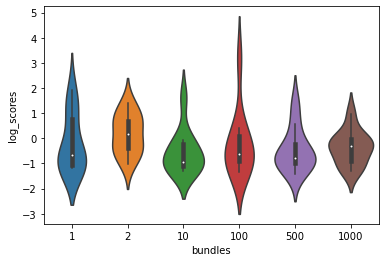

In [12]:
sns.violinplot(x = "bundles", y = "log_scores", data = df)
#plt.yscale('log')

<AxesSubplot:xlabel='forces', ylabel='log_scores'>

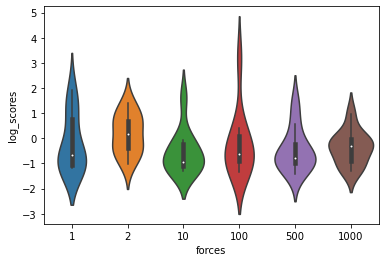

In [13]:
sns.violinplot(x = "forces", y = "log_scores", data = df)